In [ ]:
import json
import os
import pickle

import numpy as np
import torch
from PIL import Image
from skimage import io, transform
from torch.utils.data.dataloader import default_collate

import config
from datasets.base_dataset import BaseDataset
import matplotlib.pyplot as plt
from torchvision.transforms import Normalize

: 

In [2]:
from utils.visualization import visualize_occupancy, visualize_pointcloud, visualize_mesh

[[-9.9934781e-01 -1.7837340e-02  3.1397745e-02]
 [ 9.9934781e-01  1.7837340e-02 -3.1397745e-02]
 [-9.9934781e-01 -1.7837340e-02  3.1397745e-02]
 ...
 [-3.6110789e-02  4.9363938e-01 -8.6891669e-01]
 [ 3.6110789e-02 -4.9363938e-01  8.6891669e-01]
 [ 1.4936013e-16  8.6948377e-01  4.9396154e-01]]


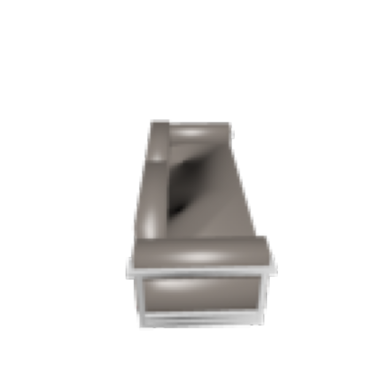

In [3]:
DATASET_ROOT = "datasets/data"
file_root = os.path.join(DATASET_ROOT, "shapenet")#examples
filename = "04256520/cc644fad0b76a441d84c7dc40ac6d743/rendering/02.dat"
label = filename.split("/", maxsplit=1)[0]#maxsplit=1 ,divide into two parts 04256520
pkl_path = os.path.join(file_root, "data_tf", filename) 
img_path = pkl_path[:-4] + ".png"
with open(pkl_path) as f:
        data = pickle.load(open(pkl_path, 'rb'), encoding="latin1")#transfer to python files, 'latin1' is the encoder method to the binary file and python object
pts, normals = data[:, :3], data[:, 3:]
print(data)
# print(pts)
# print("#############")
# print(normals)
img = io.imread(img_path)
# else:
#         img = transform.resize(img, (config.IMG_SIZE, config.IMG_SIZE))
#         img = img[:, :, :3].astype(np.float32)
plt.imshow(img)
plt.axis('off')
plt.show()

[[104  98  93  46]
 [104  98  93  86]
 [104  98  93  84]
 ...
 [145 145 145   1]
 [155 155 155   1]
 [151 151 151   2]]


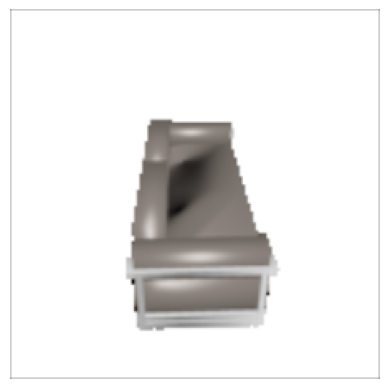

In [18]:
print(img[np.where(img[:, :, 3] != 0)])
img[np.where(img[:, :, 3] == 0)] = 255
img = transform.resize(img, (config.IMG_SIZE, config.IMG_SIZE),
                                       mode='constant', anti_aliasing=False)  # to match behavior of old versions
img = img[:, :, :3].astype(np.float32)#to numpy ndarry!! not a tensor
# else:
#         img = transform.resize(img, (config.IMG_SIZE, config.IMG_SIZE))
#         img = img[:, :, :3].astype(np.float32)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
with open(os.path.join(file_root, "meta", "shapenet.json"), "r") as fp:
        labels_map = sorted(list(json.load(fp).keys()))
labels_map = {k: i for i, k in enumerate(labels_map)}

print(labels_map)
labels_map[label]

{'02691156': 0, '02828884': 1, '02933112': 2, '02958343': 3, '03001627': 4, '03211117': 5, '03636649': 6, '03691459': 7, '04090263': 8, '04256520': 9, '04379243': 10, '04401088': 11, '04530566': 12}


9

In [6]:
visualize_pointcloud(pts, .010)

Output()

In [10]:
mesh_pos  = [0., 0., -0.8]
pts -= np.array(mesh_pos)
print(pts.shape[0])
print(normals.shape[0])
assert pts.shape[0] == normals.shape[0]#the number of points
length = pts.shape[0]
print(pts)
# img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
# img_normalized = self.normalize_img(img) if self.normalization else img


8678
8678
[[-0.04339807 -0.0572423   1.0105845 ]
 [-0.04252578 -0.07809312  1.0265028 ]
 [-0.04288828 -0.05099884  1.0303571 ]
 ...
 [ 0.06349754 -0.10061026  1.0677843 ]
 [-0.05952224 -0.10890778  1.0681828 ]
 [ 0.07260306 -0.10329883  1.056809  ]]


In [19]:
img = img[:, :, :3].astype(np.float32)
img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
img_normalized =  Normalize(mean=config.IMG_NORM_MEAN, std=config.IMG_NORM_STD)(img)

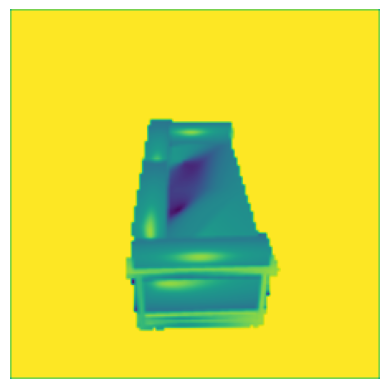

In [20]:
plt.imshow(img[0])#[1]or[2]
plt.axis('off')
plt.show()

In [14]:
visualize_pointcloud(pts, .010)

Output()